<a href="https://colab.research.google.com/github/mfirmann/social-media-sentiment-monitoring/blob/main/EDA_Skenario_1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
try:
    df = pd.read_csv('synthetic_social_media.csv')
    df['date'] = pd.to_datetime(df['date'])
    print("✅ Data berhasil dimuat.")
except FileNotFoundError:
    print("❌ File 'synthetic_social_media.csv' tidak ditemukan. Jalankan generator data dulu!")

# --- DIAGNOSTIK AWAL ---
print("\n--- Ringkasan Data ---")
print(df.info())
print("\n--- Distribusi Sentimen ---")
print(df['sentiment'].value_counts(normalize=True))

✅ Data berhasil dimuat.

--- Ringkasan Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              10000 non-null  datetime64[ns]
 1   platform          10000 non-null  object        
 2   source_type       10000 non-null  object        
 3   brand             10000 non-null  object        
 4   text              10000 non-null  object        
 5   sentiment         10000 non-null  object        
 6   topic             10000 non-null  object        
 7   issue_flag        10000 non-null  bool          
 8   engagement        10000 non-null  int64         
 9   reach_estimation  10000 non-null  int64         
 10  location          10000 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(7)
memory usage: 791.1+ KB
None

--- Distribusi Sentimen ---
sentiment
Neutral     0.4023

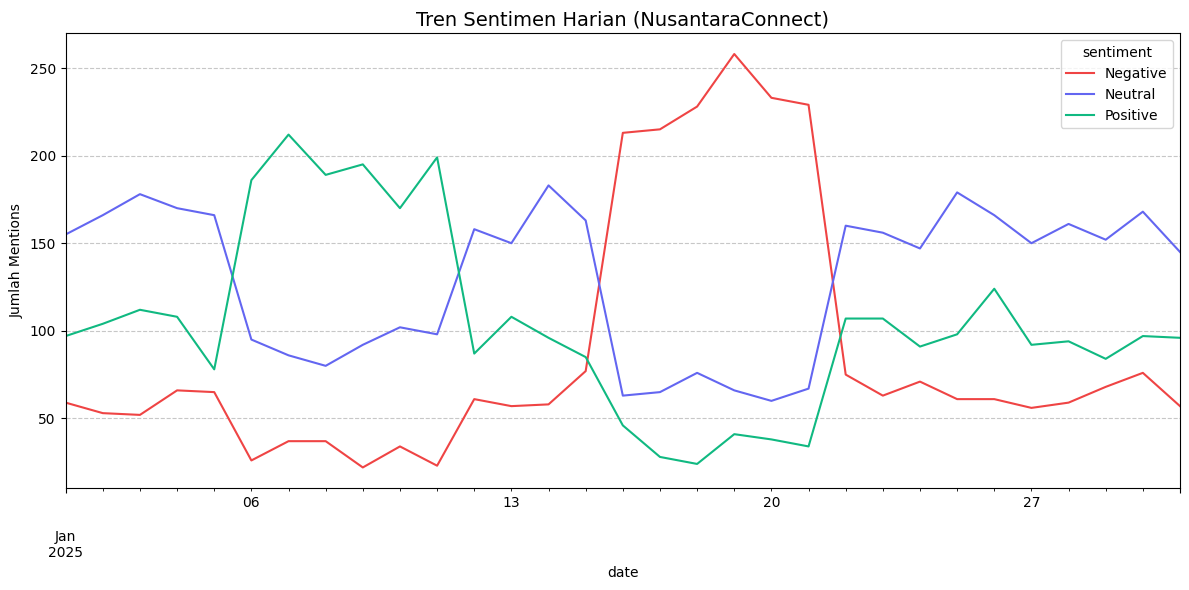

In [2]:
# 2. Visualisasi Tren Harian (Mencari Spike Krisis)
plt.figure(figsize=(12, 6))
sentiment_trend = df.groupby(['date', 'sentiment']).size().unstack().fillna(0)
sentiment_trend.plot(kind='line', ax=plt.gca(), color=['#ef4444', '#6366f1', '#10b981'])
plt.title('Tren Sentimen Harian (NusantaraConnect)', fontsize=14)
plt.ylabel('Jumlah Mentions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Dalam simulasi, Anda akan melihat lonjakan merah (Negative) di tanggal 15-20
plt.show()

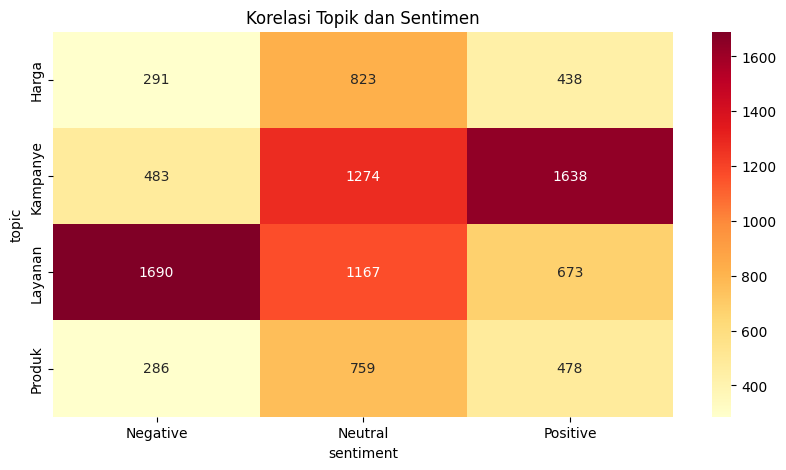

In [3]:
# 3. Analisis Topik vs Sentimen (Heatmap)
plt.figure(figsize=(10, 5))
topic_sentiment = pd.crosstab(df['topic'], df['sentiment'])
sns.heatmap(topic_sentiment, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Korelasi Topik dan Sentimen')
plt.show()

In [4]:
# 4. Deep Dive Engagement pada Sentimen Negatif
print("\n--- Top 5 Postingan Paling Viral (Sentimen Negatif) ---")
high_impact_neg = df[df['sentiment'] == 'Negative'].sort_values(by='engagement', ascending=False).head(5)
print(high_impact_neg[['date', 'platform', 'topic', 'engagement', 'text']])


--- Top 5 Postingan Paling Viral (Sentimen Negatif) ---
           date     platform     topic  engagement  \
3803 2025-01-08      Twitter  Kampanye        5000   
1118 2025-01-25  News Online    Produk        4980   
2299 2025-01-27  News Online     Harga        4960   
6278 2025-01-20        Forum   Layanan        4910   
1183 2025-01-24  News Online    Produk        4900   

                                                   text  
3803  Terlalu banyak jualan tapi gak pernah benerin ...  
1118  Aplikasi berat banget setelah update terakhir,...  
2299  Jebakan Batman banget nih harganya, awalnya mu...  
6278  Nelpon call center cuma muter-muter di mesin o...  
1183  Sinyal sering hilang-hilangan padahal tinggal ...  
